In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

In [2]:
np.set_printoptions(suppress=True, precision=11)
warnings.filterwarnings("ignore")

In [3]:
# 1-(a)
def clgs(A): 
    m, n = np.shape(A) 
    V = np.copy(A)
    Q = np.eye(m, n) 
    R = np.zeros((n, n)) 
    for j in range(n): 
        for i in range(j): 
            R[i, j] = np.matmul(np.transpose(Q[:, [i]]), A[:, [j]]) 
            V[:, [j]] = V[:, [j]] - (R[i, j] * Q[:, [i]])
        R[j, j] = np.linalg.norm(V[:, [j]])
        Q[:, [j]] = V[:, [j]] / R[j, j]
    return [Q, R]


A = np.array([[1., 3.], [5., 2.], [2., 1.]]) 

[Q, R] = clgs(A)
print(Q)
print(R)

[[ 0.18257418584  0.98058067569]
 [ 0.91287092918 -0.19611613514]
 [ 0.36514837167  0.           ]]
[[5.47722557505 2.73861278753]
 [0.            2.5495097568 ]]


In [4]:
# 1-(a)
def mgs(A):
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n-1):
        R[i, i] = np.linalg.norm(Q[:, [i]])
        Q[:, [i]] = Q[:, [i]] / R[i, i]
        R[[i], i+1:n] = np.matmul(np.transpose(Q[:, [i]]), Q[:, i+1:n])
        Q[:, i+1:n] = Q[:, i+1:n] - np.matmul(Q[:, [i]], R[[i], i+1:n])
        
    R[n-1, n-1] = np.linalg.norm(Q[:, [n-1]])
    Q[:, [n-1]] = Q[:, [n-1]] / R[n-1, n-1]
    return [Q, R]
    
A = np.array([[1., 3.], [5., 2.], [2., 1.]]) 
[Q, R] = mgs(A)
print(Q)
print(R)

[[ 0.18257418584  0.98058067569]
 [ 0.91287092918 -0.19611613514]
 [ 0.36514837167  0.           ]]
[[5.47722557505 2.73861278753]
 [0.            2.5495097568 ]]


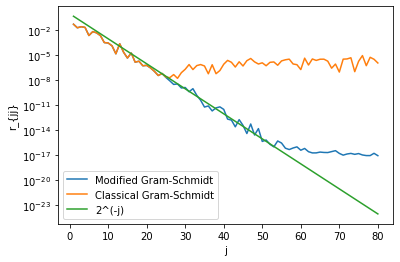

In [5]:
# 1-(a)
[U, X] = np.linalg.qr(np.random.randn(80, 80))
[V, X] = np.linalg.qr(np.random.randn(80, 80))
J = [2.**(-j) for j in range(1, 81)]
S = np.diag(J)
A = np.matmul(np.matmul(U, S), V)
[Qc, Rc] = clgs(A)
[Qm, Rm] = mgs(A)

K = list(range(1,81))
plt.xlabel('j')
plt.ylabel(r'r_{jj}')
plt.semilogy(K, np.diag(Rm), label='Modified Gram-Schmidt')
plt.semilogy(K, np.diag(Rc), label='Classical Gram-Schmidt')
plt.semilogy(K, np.diag(S), label='2^(-j)')
plt.legend(loc='lower left')
plt.show()

In [6]:
# 1-(b)
def qrhouse(A):
    m, n = np.shape(A)
    R = np.copy(A)
    V = np.zeros((m, n))
    for k in range(min(m-1, n)):
        x = R[k:m, [k]]
        v = x + np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1)
        V[k:m, [k]] = v
        R[k:m, k:n] = R[k:m, k:n] - np.matmul(2*v, np.matmul(np.transpose(v), R[k:m, k:n])) / np.matmul(np.transpose(v), v)
    R = np.triu(R[:n, :n])
    return [V, R]

def formQ(V):
    m, n = np.shape(V)
    Q = np.eye(m, n)
    for j in range(min(m-1, n)-1, -1, -1):
        v = V[:, [j]]
        Q = Q - np.matmul(2*v, np.matmul(np.transpose(v), Q)) / np.matmul(np.transpose(v), v)
    return Q

A = np.array([[1., 3.], [5., 2.], [2., 1.]]) 
[V, R] = qrhouse(A)
Q = formQ(V)
print(Q)

[[-0.18257418584  0.98058067569]
 [-0.91287092918 -0.19611613514]
 [-0.36514837167  0.           ]]


In [7]:
# 1-(b)
A = np.array([[.70000, .70711], [.70001, .70711]])
[Qm, Rm] = mgs(A)
[V, R] = qrhouse(A); Q = formQ(V)

# Since Q and Qm is orthogonal matrix, Q'Q and Qm'Qm should be identity matrix.
print('Householder:', np.linalg.norm(np.matmul(np.transpose(Q), Q) - np.eye(2)))
print('Modified GS:', np.linalg.norm(np.matmul(np.transpose(Qm), Qm) - np.eye(2)))

# Since the difference with Identity matrix is smaller in Householder QR factorization, it is more numerically stable.
# There is no rank deficiency in Householder QR.

Householder: 3.451616545114987e-16
Modified GS: 3.254726094493924e-11


In [8]:
# 2
def givens(A):
    m, n = np.shape(A)
    R = np.copy(A)
    Q = np.eye(m)
    for j in range(n):
        for i in range(m-1, j, -1):
            x = R[[i-1, i], j]
            theta = math.atan(x[1] / x[0])
            G = np.eye(m)
            G[i,i] = -math.cos(theta); G[i-1,i-1] = -math.cos(theta)
            G[i-1,i] = -math.sin(theta); G[i,i-1] = math.sin(theta)
            Q = np.matmul(Q, np.transpose(G))
            R = np.matmul(G, R)
    return [Q, R]

A = np.array([[6.,5.,0.], [5.,1.,4.],[0.,4.,3.]])
[Q, R] = givens(A)
print(Q)
print(R)

[[-0.7682212796   0.33265417936 -0.54697098874]
 [-0.64018439966 -0.39918501523  0.65636518649]
 [ 0.             0.85439599751  0.51962243931]]
[[-7.81024967591 -4.48129079765 -2.56073759866]
 [ 0.             4.68166987163  0.96644793161]
 [-0.             0.             4.18432806389]]


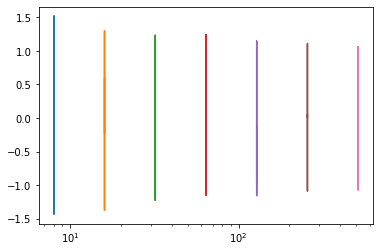

In [9]:
# 3 - (a)

cand = [8, 16, 32, 64, 128, 256, 512]
mat_no = 100
for m in cand:
    eig = np.zeros(m * mat_no)
    for i in range(mat_no):
        A = np.random.randn(m, m) / np.sqrt(m)
        w, v = np.linalg.eig(A)
        eig[m*i:m*(i+1)] = w
    plt.semilogx([m for i in range(m * mat_no)], eig)

# As m increases, the maximum absolute value of eigenvalue(spectral radius) decreases. 
# However, it seems like the decreasing size also decreases.

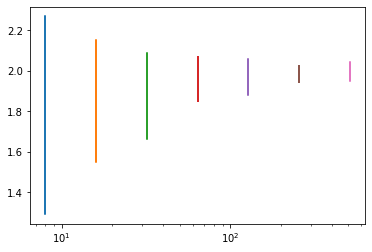

In [10]:
# 3 - (b)

cand = [8, 16, 32, 64, 128, 256, 512]
mat_no = 100
for m in cand:
    norms = np.zeros(mat_no)
    for i in range(mat_no):
        A = np.random.randn(m, m) / np.sqrt(m)
        norm = np.linalg.norm(A, ord=2)
        norms[i] = norm
    plt.semilogx([m for i in range(mat_no)], norms)
    
# You can find that matrix 2-norm is larger than spectral radius. 
# Also, as m increases, the inequality does NOT appear to approach an equality.

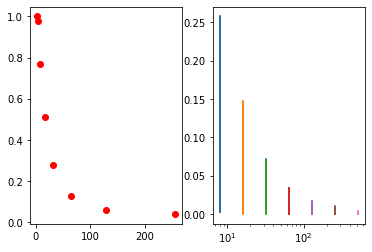

In [11]:
# 3 - (c)

mat_no = 100
m = 8
norms = np.zeros(mat_no)
for i in range(mat_no):
    A = np.random.randn(m, m) / np.sqrt(m)
    norm = np.linalg.norm(A, ord=-2)
    norms[i] = norm

bounds = [2, 4, 8, 16, 32, 64, 128, 256]
props = [np.mean(norms <= 1/bound) for bound in bounds]
plt.subplot(121)
plt.plot(bounds, props, 'ro')

# When m is doubled, the proportion of matrices that "minimum singular value <= 1/m" becomes slightly more than half.
# The tail of the probability distribution looks like Gaussian distribution.



cand = [8, 16, 32, 64, 128, 256, 512]
for m in cand:
    norms = np.zeros(mat_no)
    for i in range(mat_no):
        A = np.random.randn(m, m) / np.sqrt(m)
        norm = np.linalg.norm(A, ord=-2)
        norms[i] = norm
    
    plt.subplot(122)
    plt.semilogx([m for i in range(mat_no)], norms)

# As m increases, the smallest singular value goes smaller.

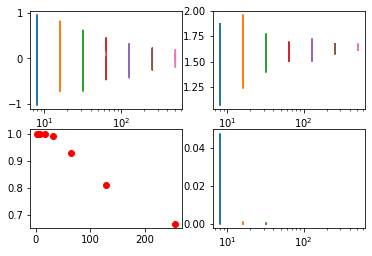

In [12]:
# 3 - (d)

# When you change full matrices to upper triangular matrices, 
# the scale of values (e.g. spectral radius, 2-norm, smallest singular value) all becomes smaller than before.
# However, the increase/decrease property does not change as m changes. (Inequality also does not approach equality.)

cand = [8, 16, 32, 64, 128, 256, 512]
mat_no = 100
for m in cand:
    eig = np.zeros(m * mat_no)
    for i in range(mat_no):
        A = np.triu(np.random.randn(m, m)) / np.sqrt(m)
        w, v = np.linalg.eig(A)
        eig[m*i:m*(i+1)] = w
    plt.subplot(221)
    plt.semilogx([m for i in range(m * mat_no)], eig)


for m in cand:
    norms = np.zeros(mat_no)
    for i in range(mat_no):
        A = np.triu(np.random.randn(m, m)) / np.sqrt(m)
        norm = np.linalg.norm(A, ord=2)
        norms[i] = norm
    plt.subplot(222)
    plt.semilogx([m for i in range(mat_no)], norms)   
    

m = 8
norms = np.zeros(mat_no)
for i in range(mat_no):
    A = np.triu(np.random.randn(m, m)) / np.sqrt(m)
    norm = np.linalg.norm(A, ord=-2)
    norms[i] = norm

bounds = [2, 4, 8, 16, 32, 64, 128, 256]
props = [np.mean(norms <= 1/bound) for bound in bounds]
plt.subplot(223)
plt.plot(bounds, props, 'ro')


for m in cand:
    norms = np.zeros(mat_no)
    for i in range(mat_no):
        A = np.triu(np.random.randn(m, m)) / np.sqrt(m)
        norm = np.linalg.norm(A, ord=-2)
        norms[i] = norm
    
    plt.subplot(224)
    plt.semilogx([m for i in range(mat_no)], norms)

In [14]:
# 4 

m = 50
n = 12

t = np.linspace(0, 1, m)
A = np.fliplr(np.vander(t, n))
b = np.cos(4*t)

# (a)
x_1 = np.linalg.solve(np.matmul(np.transpose(A), A), np.matmul(np.transpose(A), b))
print('x_1\n', '\033[31m', x_1, '\033[0m')

# (b)
[Q, R] = mgs(A)
x_2 = np.linalg.solve(R, np.matmul(np.transpose(Q), b))
print('\nx_2\n', '\033[31m', x_2, '\033[0m')

# (c)
[V, R] = qrhouse(A)
Q = formQ(V)
x_3 = np.linalg.solve(R, np.matmul(np.transpose(Q), b))
print('\nx_3\n', x_3)

# (d)
Q, R = np.linalg.qr(A)
x_4 = np.linalg.solve(R, np.matmul(np.transpose(Q), b))
print('\nx_4\n', x_4)

# (e)
# A\b is impossible in Python. I calculated A\b in Matlab and wrote below.
print('\nx_5\n', 'Matlab Result\n'
'''ans =

   1.000000000996607
  -0.000000422743364
  -7.999981235676154
  -0.000318763346323
  10.669430796641096
  -0.013820290914619
  -5.647075619959385
  -0.075316036589419
   1.693606976803618
   0.006032099645104
  -0.374241699881279
   0.088040575462356'''
)


# (f)
u, s, vh = np.linalg.svd(A)
x_6 = np.matmul(np.matmul(np.transpose(vh), np.concatenate((np.diag(1/s), np.zeros((n, m-n))), axis=1)), np.matmul(np.transpose(u), b))
print('\nx_6\n', x_6)


# x_1 and x_2 produces the digits that appear to be wrong due to round-off error.
# Conversely, solutions using Householder QR and SVD shows stability.
# Therefore, we can notice that the solution of normal equations(x_1) exhibits instability. 

x_1
  [ 1.0000000267  -0.00000799095 -7.9996970371  -0.004506381
 10.70149198984 -0.15852142812 -5.23676443833 -0.8268261131
  2.58165417207 -0.64773847278 -0.10155515833  0.03882719423] 

x_2
  [ 1.00000000072 -0.00000031765 -7.99998554886 -0.00025118158
 10.66888851355 -0.01127938505 -5.65450548994 -0.06135294324
  1.6767417645   0.01868453684 -0.37960643417  0.08902286577] 

x_3
 [ 1.000000001   -0.00000042274 -7.99998123568 -0.00031876333
 10.66943079657 -0.01382029077 -5.64707562003 -0.07531603693
  1.69360697767  0.00603209872 -0.37424169939  0.08804057536]

x_4
 [ 1.000000001   -0.00000042274 -7.99998123568 -0.00031876332
 10.66943079645 -0.01382029007 -5.64707562225 -0.0753160326
  1.69360697233  0.00603210277 -0.37424170112  0.08804057567]

x_5
 Matlab Result
ans =

   1.000000000996607
  -0.000000422743364
  -7.999981235676154
  -0.000318763346323
  10.669430796641096
  -0.013820290914619
  -5.647075619959385
  -0.075316036589419
   1.693606976803618
   0.006032099645104
  -0